In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("./Stores_Transactions.csv")
data.head()

,user_id,transaction_id,transaction_date,transaction_time,store,product_name,quantity,unit_price,total_price,total_amount,total_items
0,1,1,1403-01-01,23:38:58,Jewelry Store,Jewelry Store Product 38,1,1658456.89,1658456.89,1658456.89,1
1,1,2,1403-01-02,16:41:29,Electronics Store,Electronics Store Product 82,1,1462060.36,1462060.36,1462060.36,1
2,1,3,1403-01-03,07:45:32,Cosmetics Store,Cosmetics Store Product 26,1,105516.10,105516.10,323033.43,2
3,1,3,1403-01-03,07:45:32,Cosmetics Store,Cosmetics Store Product 17,1,217517.33,217517.33,323033.43,2
4,1,4,1403-01-04,15:22:12,Hardware Store,Hardware Store Product 40,1,1949500.13,1949500.13,6191593.89,6


In [12]:
from convertdate import persian

def convert_to_gregorian(persian_date):
    year, month, day = map(int, persian_date.split('-'))
    # استفاده از تابع صحیح برای تبدیل تاریخ شمسی به میلادی
    return persian.to_gregorian(year, month, day)

# تبدیل تاریخ‌ها به میلادی
data['transaction_date'] = data['transaction_date'].apply(convert_to_gregorian)

# تبدیل به فرمت مناسب pandas datetime
data['transaction_date'] = pd.to_datetime(data['transaction_date'].apply(lambda x: '-'.join(map(str, x))), format='%Y-%m-%d')



In [13]:
data.head()

,user_id,transaction_id,transaction_date,transaction_time,store,product_name,quantity,unit_price,total_price,total_amount,total_items
0,1,1,2024-03-20,23:38:58,Jewelry Store,Jewelry Store Product 38,1,1658456.89,1658456.89,1658456.89,1
1,1,2,2024-03-21,16:41:29,Electronics Store,Electronics Store Product 82,1,1462060.36,1462060.36,1462060.36,1
2,1,3,2024-03-22,07:45:32,Cosmetics Store,Cosmetics Store Product 26,1,105516.10,105516.10,323033.43,2
3,1,3,2024-03-22,07:45:32,Cosmetics Store,Cosmetics Store Product 17,1,217517.33,217517.33,323033.43,2
4,1,4,2024-03-23,15:22:12,Hardware Store,Hardware Store Product 40,1,1949500.13,1949500.13,6191593.89,6


In [42]:
data['transaction_time'] = pd.to_datetime(data['transaction_time'], format='%H:%M:%S').dt.time

print(data.isnull().sum())


user_id                 0
transaction_id          0
transaction_date        0
transaction_time        0
store                   0
product_name            0
quantity                0
unit_price              0
total_price             0
total_amount            0
total_items             0
day_of_week             0
hour_of_day             0
transaction_datetime    0
dtype: int64


In [34]:
# استخراج روز هفته و ساعت از تاریخ و زمان
data['day_of_week'] = data['transaction_date'].dt.day_name()


# تعداد خریدها در روزهای مختلف هفته
day_of_week_sales = data.groupby('day_of_week')['transaction_id'].count()


day_of_week_sales


day_of_week
Friday       1148
Monday       1124
Saturday     1320
Sunday       1116
Thursday     1080
Tuesday      1164
Wednesday    1240
Name: transaction_id, dtype: int64

In [41]:
# پیدا کردن روز هفته با بیشترین تعداد خرید
max_sales_day = day_of_week_sales.idxmax()

# تعداد خریدها در آن روز
max_sales_count = day_of_week_sales.max()

print(f"بیشترین تعداد خرید در روز {max_sales_day} با {max_sales_count} خرید انجام شده است.")


بیشترین تعداد خرید در روز Saturday با 1320 خرید انجام شده است.


In [38]:
data['hour_of_day'] = data['transaction_time'].apply(lambda x: x.hour)
# تعداد خریدها در ساعت‌های مختلف روز
hour_of_day_sales = data.groupby('hour_of_day')['transaction_id'].count()
hour_of_day_sales



hour_of_day
0     362
1     323
2     355
3     349
4     360
5     348
6     383
7     338
8     307
9     393
10    299
11    340
12    349
13    357
14    300
15    258
16    311
17    391
18    328
19    338
20    320
21    378
22    348
23    357
Name: transaction_id, dtype: int64

In [40]:
# پیدا کردن ساعت با بیشترین تعداد خرید
max_sales_hour = hour_of_day_sales.idxmax()

# تعداد خریدها در آن ساعت
max_sales_count = hour_of_day_sales.max()

print(f"بیشترین تعداد خرید در ساعت {max_sales_hour} با {max_sales_count} خرید انجام شده است.")


بیشترین تعداد خرید در ساعت 9 با 393 خرید انجام شده است.


In [16]:
# مجموع فروش‌ها در هر فروشگاه
store_sales = data.groupby('store')['total_price'].sum()

store_sales


store
Bookstore               2.135477e+08
Chain Store             8.477238e+08
Clothing Store          1.476769e+09
Cosmetics Store         3.563268e+08
Electronics Store       3.855097e+09
Florist Store           1.181164e+08
Furniture Store         1.389610e+09
Hardware Store          9.986125e+08
Home Appliance Store    4.831257e+09
Jewelry Store           1.226038e+10
Music Store             9.247326e+07
Pet Store               2.898425e+08
Sporting Goods Store    5.665938e+08
Supermarket             3.942086e+08
Toy Store               3.754816e+08
Name: total_price, dtype: float64

In [17]:
# تعداد تراکنش‌ها در هر فروشگاه
store_transactions = data.groupby('store')['transaction_id'].count()

store_transactions


store
Bookstore               394
Chain Store             776
Clothing Store          585
Cosmetics Store         556
Electronics Store       425
Florist Store           716
Furniture Store         377
Hardware Store          511
Home Appliance Store    335
Jewelry Store           365
Music Store             518
Pet Store               549
Sporting Goods Store    516
Supermarket             973
Toy Store               596
Name: transaction_id, dtype: int64

In [18]:
# مجموع فروش برای هر محصول
product_sales = data.groupby('product_name')['total_price'].sum()

# نمایش پرفروش‌ترین محصولات
print(product_sales.sort_values(ascending=False).head())


product_name
Jewelry Store Product 32    5.322176e+08
Jewelry Store Product 23    5.078559e+08
Jewelry Store Product 24    4.947495e+08
Jewelry Store Product 35    4.577688e+08
Jewelry Store Product 31    4.078780e+08
Name: total_price, dtype: float64


In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ویژگی‌های مشتریان برای خوشه‌بندی (برای مثال مجموع خرید و تعداد خریدها)
customer_features = data.groupby('user_id').agg({'total_price': 'sum', 'transaction_id': 'count'}).reset_index()

# نرمال‌سازی ویژگی‌ها
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features[['total_price', 'transaction_id']])

# اعمال الگوریتم KMeans
kmeans = KMeans(n_clusters=5)
customer_features['cluster'] = kmeans.fit_predict(customer_features_scaled)

# نمایش خوشه‌ها
print(customer_features.head())


   user_id   total_price  transaction_id  cluster
0        1  2.251340e+09             661        0
1        2  2.795794e+09             673        3
2        3  2.713384e+09             708        3
3        4  1.687042e+09             717        2
4        5  2.273373e+09             624        4


In [21]:
customer_features = data.groupby('user_id').agg({
    'total_price': 'sum',  # مجموع مبلغ خرید
    'transaction_id': 'count'  # تعداد تراکنش‌ها
}).reset_index()

# تغییر نام ستون‌ها برای راحتی
customer_features.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features[['total_price', 'transaction_count']])

# اجرای K-Means با 3 خوشه (می‌توانید تعداد خوشه‌ها را تغییر دهید)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_features['cluster'] = kmeans.fit_predict(customer_features_scaled)


In [22]:
customer_features.head()

,user_id,total_price,transaction_count,cluster
0,1,2.251340e+09,661,0
1,2,2.795794e+09,673,2
2,3,2.713384e+09,708,1
3,4,1.687042e+09,717,0
4,5,2.273373e+09,624,0


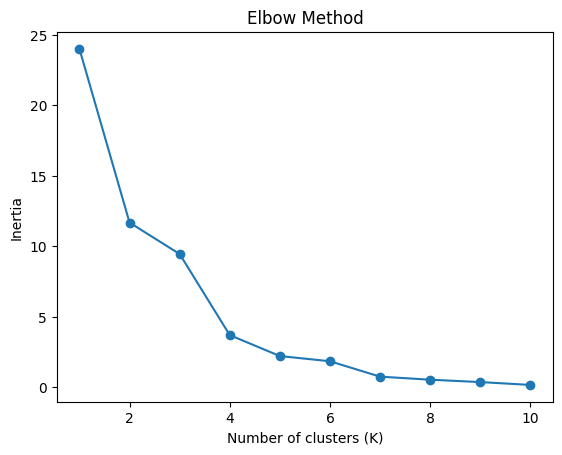

In [23]:
import matplotlib.pyplot as plt

# پیدا کردن بهترین تعداد خوشه‌ها با استفاده از روش Elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_features_scaled)
    inertia.append(kmeans.inertia_)

# رسم نمودار Elbow
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# فرض می‌کنیم که داده‌ها در یک DataFrame به نام 'data' هستند

# استخراج ویژگی‌های معنی‌دار برای تحلیل بیشتر
customer_features = data.groupby('user_id').agg({
    'total_price': 'sum',  # مجموع مبلغ خرید
    'transaction_id': 'count',  # تعداد تراکنش‌ها
    'product_name': 'nunique',  # تعداد محصولات مختلفی که خریداری کرده‌اند
    'total_items': 'sum',  # مجموع تعداد اقلام خریداری‌شده
}).reset_index()

# محاسبه میانگین مبلغ خرید (total_price / تعداد تراکنش‌ها)
customer_features['average_purchase'] = customer_features['total_price'] / customer_features['transaction_id']

# تبدیل ستون تاریخ و زمان به رشته و سپس ترکیب آن‌ها
data['transaction_datetime'] = pd.to_datetime(data['transaction_date'].astype(str) + ' ' + data['transaction_time'].astype(str))

# مرتب کردن داده‌ها بر اساس user_id و transaction_datetime
data_sorted = data.sort_values(by=['user_id', 'transaction_datetime'])

# محاسبه فاصله زمانی بین خریدها برای هر مشتری
data_sorted['time_diff'] = data_sorted.groupby('user_id')['transaction_datetime'].diff().fillna(pd.Timedelta(seconds=0))

# محاسبه میانگین فاصله زمانی خریدها
purchase_frequency = data_sorted.groupby('user_id')['time_diff'].mean().reset_index()
purchase_frequency.rename(columns={'time_diff': 'avg_time_between_purchases'}, inplace=True)

# تبدیل فاصله زمانی به ثانیه برای نرمال‌سازی
purchase_frequency['avg_time_between_purchases'] = purchase_frequency['avg_time_between_purchases'].dt.total_seconds()

# ترکیب دو ویژگی جدید: میانگین فاصله زمانی و ویژگی‌های دیگر
customer_features = pd.merge(customer_features, purchase_frequency, on='user_id')

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['total_price', 'transaction_id', 'product_name', 'average_purchase', 'total_items', 'avg_time_between_purchases']])

# اجرای K-Means با 3 خوشه
kmeans = KMeans(n_clusters=3, random_state=42)
customer_features['cluster'] = kmeans.fit_predict(scaled_features)

# بررسی نتایج خوشه‌بندی
print(customer_features.groupby('cluster').mean())  # ویژگی‌های متوسط هر خوشه


         user_id   total_price  transaction_id  product_name  total_items  \
cluster                                                                     
0            6.5  2.283527e+09           653.0    501.166667  5485.833333   
1            6.5  1.760903e+09           703.0    542.000000  6438.500000   
2            6.5  2.710768e+09           717.0    551.250000  6524.250000   

         average_purchase  avg_time_between_purchases  
cluster                                                
0            3.497600e+06                28333.311441  
1            2.507927e+06                26190.019903  
2            3.789379e+06                25866.210750  
